In [130]:
""" Cualquier librería adicional que necesiteis durante el ejercicio, importadlo en esta sección """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_selection import RFECV

# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como '_# codigo-alumno_'. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda adicional. 

El estudiante tendrá siempre que introducir una semilla (seed) que generará acorde a su fecha de nacimiento (sin ser intrusivos en edad).

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero.

In [2]:
""" El estudiante tendrá que utilizar la semilla proporcionada para todos los procesos aleatorios """

seed = 30 + 13 * 6

### Data cleaning

In [3]:
""" Leed el dataframe de sklearn llamado 'fetch_kddcup99' y almacenarlo en una variable llamada data """
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame = True) # as_fram = True esta disponible a partir de la version 0.24
pd_data = data.frame
pd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1,0,0.11,0,0,0,0,0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1,0,0.05,0,0,0,0,0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1,0,0.03,0,0,0,0,0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1,0,0.03,0,0,0,0,0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1,0,0.02,0,0,0,0,0,b'normal.'


In [4]:
""" De entre todas las variables del dataframe, solo trabajaremos en 
    este ejercicio con las descritas en key_columns, por lo que tendréis que quitar el resto """

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'labels']

pd_data = pd_data[key_columns]

pd_data.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,b'tcp',b'http',b'SF',1,8,8,0,9,0,b'normal.'
1,0,b'tcp',b'http',b'SF',1,8,8,0,19,0,b'normal.'
2,0,b'tcp',b'http',b'SF',1,8,8,0,29,0,b'normal.'
3,0,b'tcp',b'http',b'SF',1,6,6,0,39,0,b'normal.'
4,0,b'tcp',b'http',b'SF',1,6,6,0,49,0,b'normal.'


In [5]:
""" Comprobad que no haya nulos ni registros duplicados """

print(pd_data.isnull().sum()) # No hay valores nulos
print("############################################")
print("Total filas duplicadas: ", pd_data.duplicated().sum()) # Pero si filas duplicadas

duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64
############################################
Total filas duplicadas:  439856


In [6]:
pd_data = pd_data.drop_duplicates() # Eliminamos dichos duplicados
print("Total filas duplicadas: ", pd_data.duplicated().sum())

Total filas duplicadas:  0


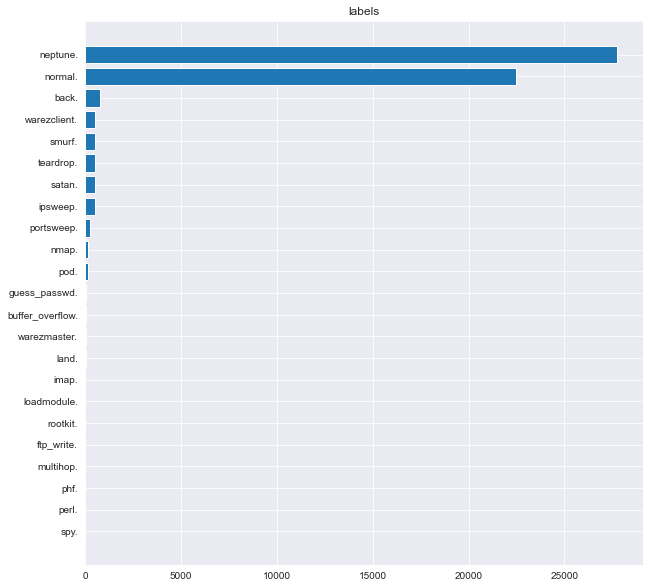

In [8]:
""" Mostrar un barplot para la variable objetivo (labels)"""

def mostrar_grafico_barras(columna):
    k = pd_data.groupby([columna]).size().sort_values()
    k.index = k.index.astype(str)
    fig = plt.figure(figsize=(10,10))
    plt.barh(k.index, k)
    plt.title(columna)
    plt.show()

target = 'labels' # Variable objetivo

mostrar_grafico_barras(target)

In [10]:
""" Dado que hay dos etiquetas que se repiten con mayor frecuencia, 
    transformad la variable labels para que tenga un valor booleano que indique 
    si es la etiqueta más frecuente o la segunda más frecuente, 
    los demás registros los eliminaremos de este estudio """
pd_data = pd_data[pd_data.labels.isin([b'normal.', b'neptune.'])]
print(len(pd_data))
pd_data.groupby(target).size().sort_values(ascending=False)

50177


labels
b'neptune.'    27722
b'normal.'     22455
dtype: int64

In [11]:
pd_data[target] = pd_data.labels.apply(lambda x: True if x == b'neptune.' else False)

print(len(pd_data))
pd_data.groupby(target).size().sort_values(ascending=False)

50177


labels
True     27722
False    22455
dtype: int64

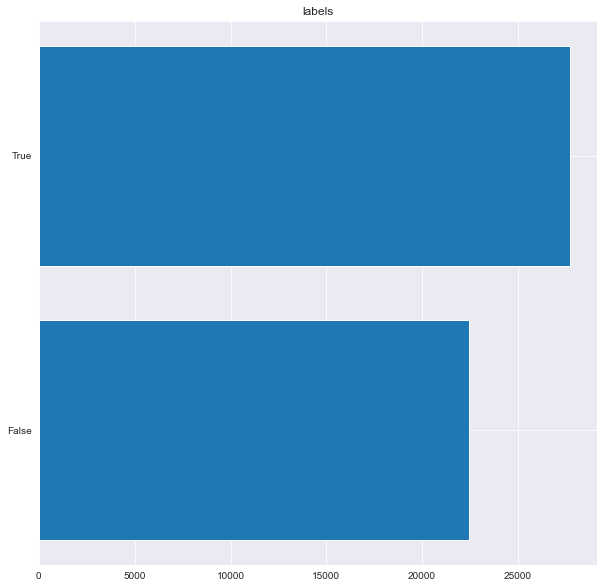

In [12]:
""" Volved a mostrar el barplot para la variable objetivo (labels) """
mostrar_grafico_barras(target)

In [13]:
""" Separaremos las variables categóricas de las numéricas """
num_cols = ['duration', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
cat_cols = ['protocol_type', 'service', 'flag', 'logged_in']

pd_data[num_cols] = pd_data[num_cols].astype(float)

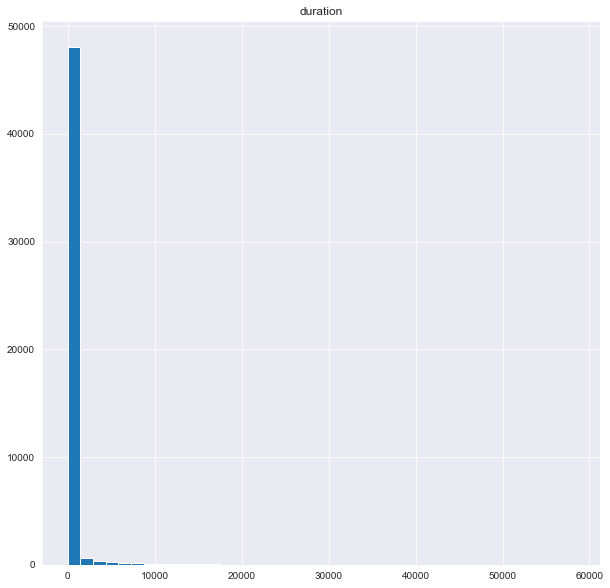

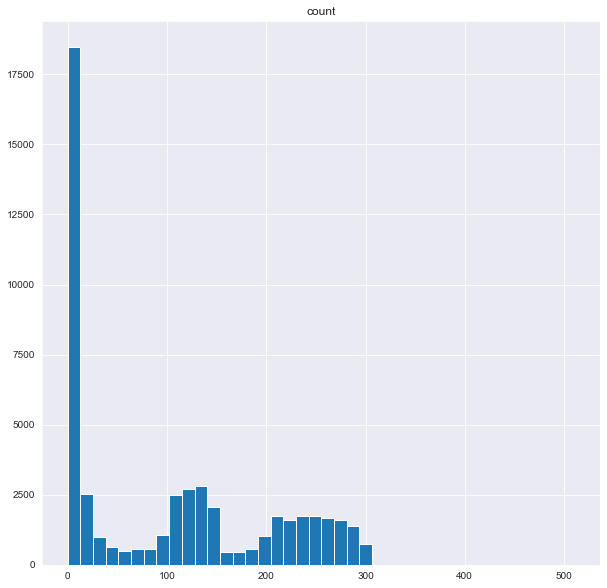

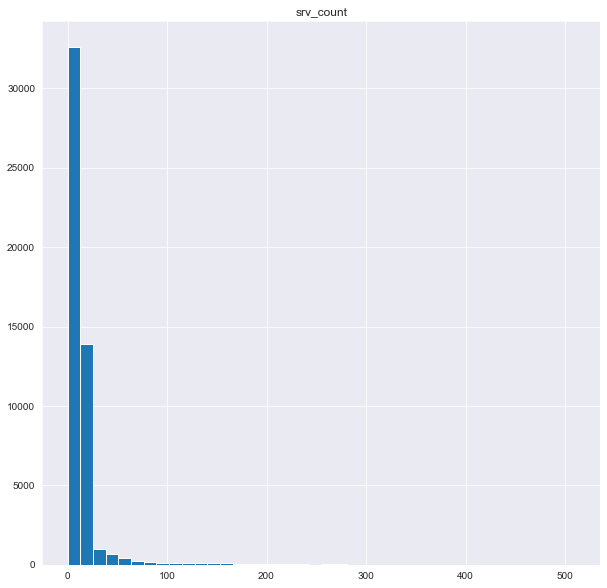

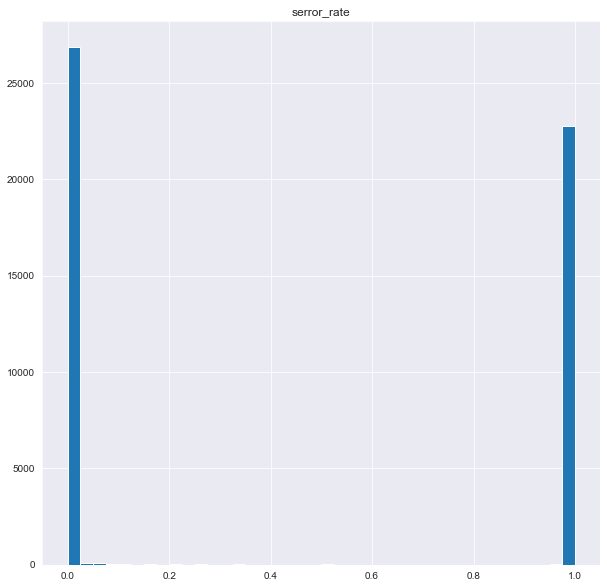

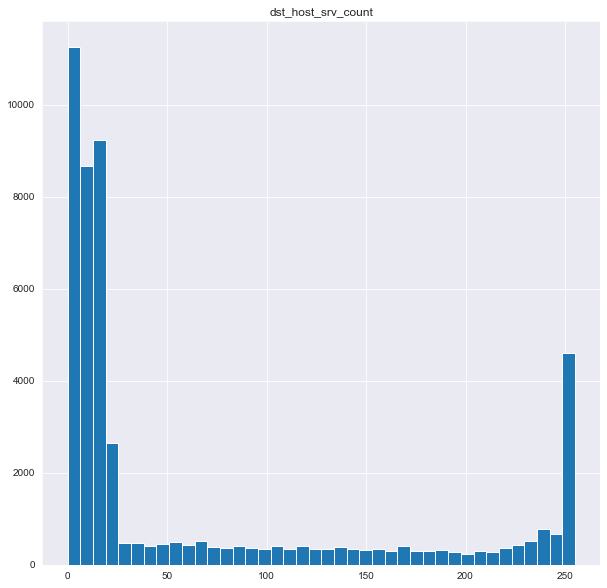

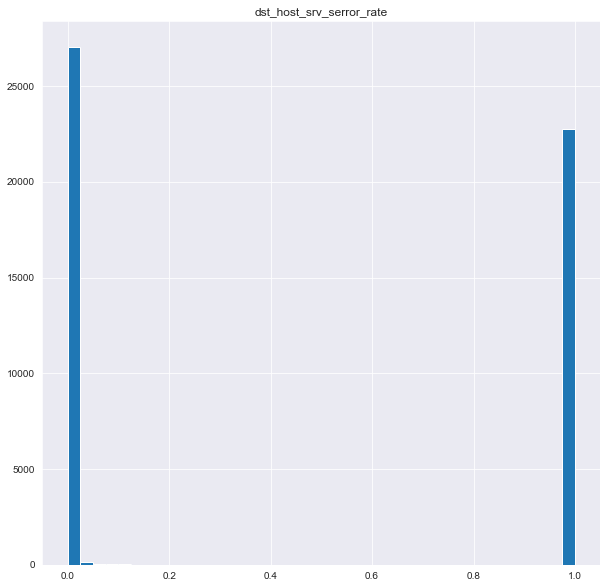

In [14]:
""" Mostrad un histograma por cada variable numérica """
for columna in num_cols:
    plt.figure(figsize=(10,10))
    plt.hist(pd_data[columna], bins = 40)
    plt.title(columna)
    plt.show()

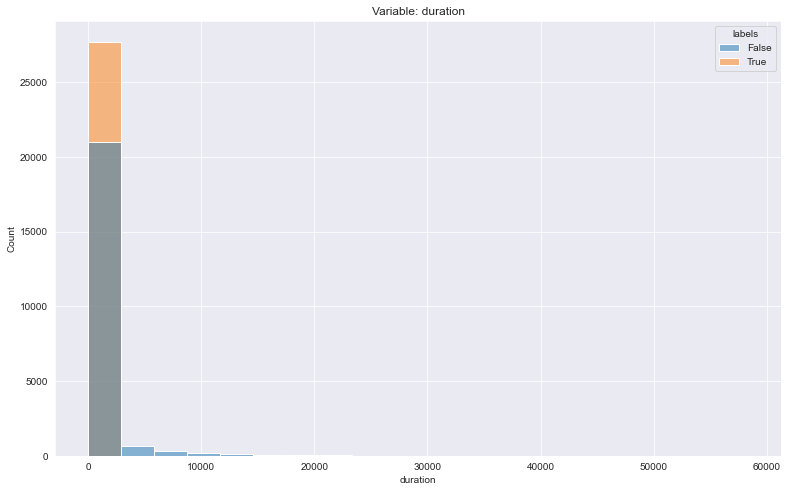

In [18]:
""" Por la forma de los histogramas, podría ser un buen estudio convertir las variables
    numéricas a variables dummy, es lo que hareis en este apartado y, por tanto, pasarán 
    a ser categóricas todas las variables del dataframe. Esta parte será libre para el 
    estudiante. Deberá tomar la decisión que considere más apropiada para realizar esta 
    binarización """

# Inicialmente, mostramos la distribucion de cada una de las variables continuas en funcion de 
# la variable objetivo
pd.options.display.max_rows = 4000

def agrupar_datos(columna):
    label_true = pd.DataFrame(pd_data[pd_data['labels'] == True].groupby([columna]).size())
    label_false = pd.DataFrame(pd_data[pd_data['labels'] == False].groupby([columna]).size())
    
    pd_data_concat = pd.concat([label_true, label_false], axis = 1)
    pd_data_concat.columns = ['True', 'False']
    return pd_data_concat

def mostrar_histograma(columna):
    plt.figure(figsize=(13,8))
    sns.histplot(x=columna, data=pd_data, hue='labels', kde=False, bins=20)
    plt.title(str('Variable: ' + columna))
    plt.show()

mostrar_histograma('duration') 

In [19]:
# duration 0; 1+
pd_data_concat = agrupar_datos('duration')

In [20]:
pd_data_concat

,True,False
duration,,
0.0,27722.0,15153
1.0,NaN,1102
2.0,NaN,567
3.0,NaN,424
4.0,NaN,287
5.0,NaN,286
6.0,NaN,136
7.0,NaN,124
8.0,NaN,92


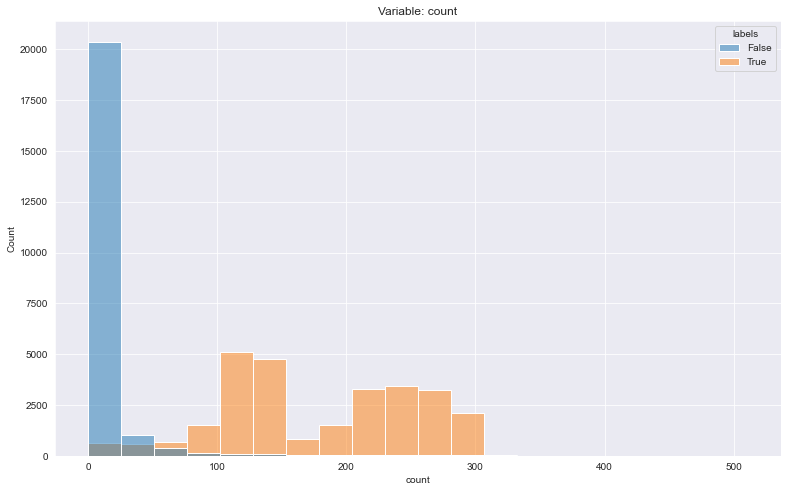

In [22]:
# count [0-24]; (24-200]; +200  
mostrar_histograma('count')

pd_data_concat = agrupar_datos('count')

In [454]:
pd_data_concat

,True,False
count,,
0.0,NaN,1.0
1.0,19.0,9374.0
2.0,14.0,2794.0
3.0,29.0,1028.0
4.0,17.0,1057.0
5.0,20.0,783.0
6.0,17.0,679.0
7.0,20.0,567.0
8.0,22.0,463.0


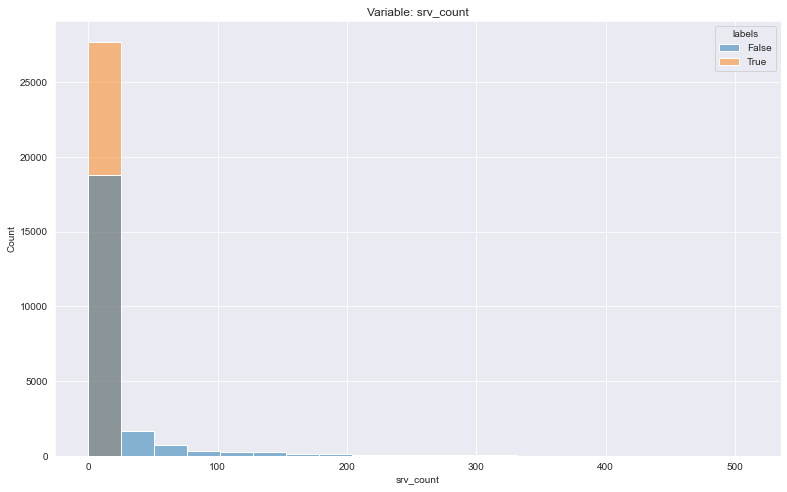

In [24]:
# srv_count [0-3]; (3-25]; +25
mostrar_histograma('srv_count')

pd_data_concat = agrupar_datos('srv_count')

In [25]:
pd_data_concat

,True,False
srv_count,,
0.0,NaN,1
1.0,1302.0,6383
2.0,1335.0,3979
3.0,1350.0,1556
4.0,1299.0,993
5.0,1382.0,639
6.0,1359.0,596
7.0,1345.0,471
8.0,1396.0,422


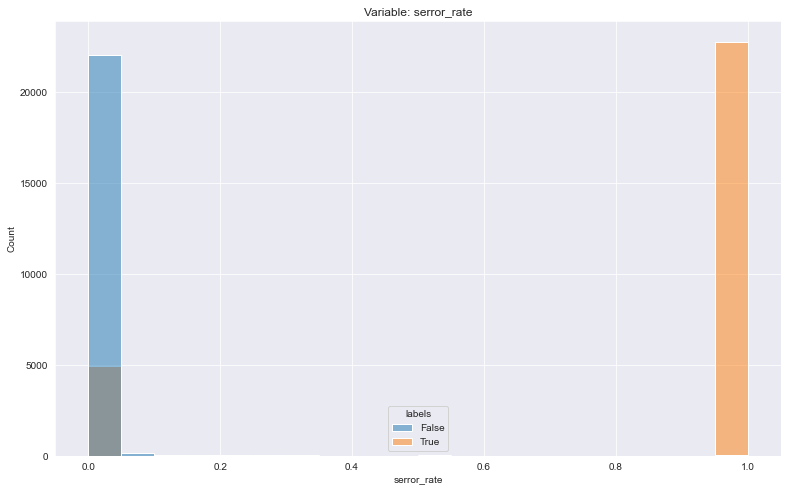

In [26]:
# serror_rate [0-0.5] ; (0.5 - 1)
mostrar_histograma('serror_rate')

pd_data_concat = agrupar_datos('serror_rate')

In [27]:
pd.DataFrame(pd_data['serror_rate'].describe())

,serror_rate
count,50177.000000
mean,0.456563
std,0.496846
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [28]:
pd_data_concat

,True,False
serror_rate,,
0.00,4916.0,21936.0
0.01,NaN,1.0
0.02,NaN,11.0
0.03,NaN,35.0
0.04,NaN,36.0
0.05,NaN,34.0
0.06,NaN,43.0
0.07,NaN,34.0
0.08,NaN,33.0


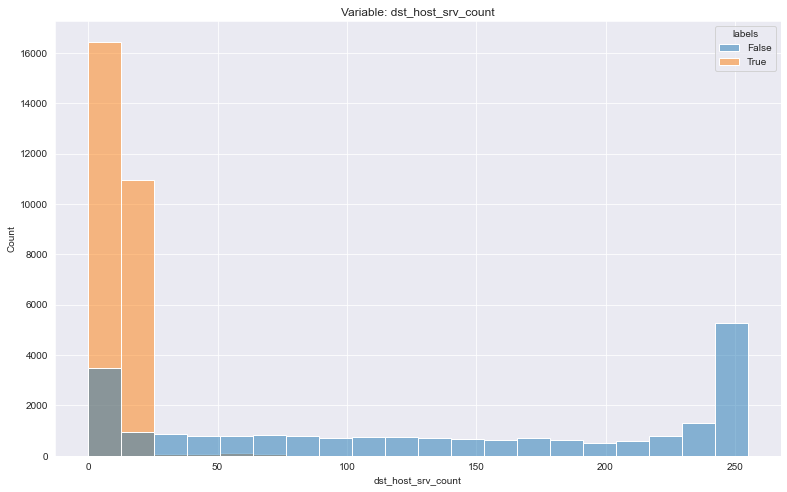

In [29]:
# dst_host_srv_count [0-2]; (2-25]; (25-70] +70
mostrar_histograma('dst_host_srv_count')

pd_data_concat = agrupar_datos('dst_host_srv_count')

In [30]:
pd_data_concat

,True,False
dst_host_srv_count,,
0.0,NaN,2
1.0,1369.0,1261
2.0,1430.0,1065
3.0,1380.0,347
4.0,1342.0,154
5.0,1377.0,98
6.0,1347.0,84
7.0,1359.0,69
8.0,1379.0,72


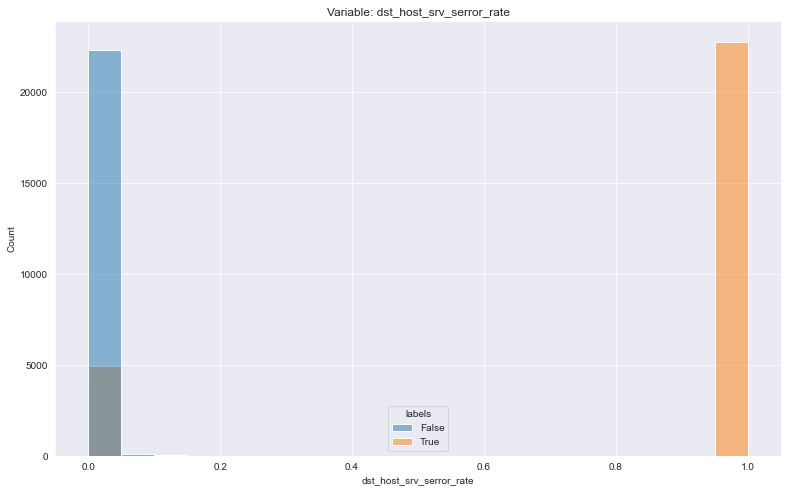

In [32]:
# dst_host_srv_serror_rate [0-1) 1
mostrar_histograma('dst_host_srv_serror_rate')

pd_data_concat = agrupar_datos('dst_host_srv_serror_rate')

In [33]:
pd_data_concat

,True,False
dst_host_srv_serror_rate,,
0.00,4916.0,19816.0
0.01,1.0,1858.0
0.02,NaN,451.0
0.03,NaN,109.0
0.04,NaN,61.0
0.05,NaN,27.0
0.06,NaN,21.0
0.07,NaN,8.0
0.08,1.0,9.0


In [34]:
# En primer lugar, codificamos las variables a categoricas, en base a los intervalos acordados
# duration: 0 1+
pd_data['duration'] = pd_data['duration'].apply(lambda x: "0" if x==0 else "1+")

# count: [0-24]; [25-200); +200
pd_data['count'] = pd_data['count'].apply(lambda x: "[0-24]" if x<=24 else "[25-200)" if x<=200 else "+200")

# srv_count: [0-3]; [4-25]; +25
pd_data['srv_count'] = pd_data['srv_count'].apply(lambda x: "[0-3]" if x<=3 else "[4-25]" if x<=25 else "+25")

# serror_date: [0-0.5] ; (0.5 - 1]
pd_data['serror_rate'] = pd_data['serror_rate'].apply(lambda x: "[0-0.5]" if x<= 0.5 else "(0.5-1]")

# dst_host_srv_count: [0-2]; [3-25]; [26-70] +70
pd_data['dst_host_srv_count'] = pd_data['dst_host_srv_count'].apply(lambda x: "[0-2]" if x<= 2 else "[3-25]" if x<=25 else "[26-70]" if x<=70 else "+70")

# dst_host_srv_serror_rate: [0-1); 1
pd_data['dst_host_srv_serror_rate'] = pd_data['dst_host_srv_serror_rate'].apply(lambda x: "[0-1)" if x<1 else "1")

In [44]:
for columna in num_cols:
    display(pd.DataFrame(pd_data.groupby(columna).size(), columns=['']))

,
duration,
0,42875
1+,7302


,
count,
+200,12824
[0-24],20879
[25-200),16474


,
srv_count,
+25,3638
[0-3],15906
[4-25],30633


,
serror_rate,
(0.5-1],22847
[0-0.5],27330


,
dst_host_srv_count,
+70,15156
[0-2],5127
[26-70],3211
[3-25],26683


,
dst_host_srv_serror_rate,
1,22753
[0-1),27424


In [45]:
# Por ultimo, codificamos las variables a formato dummy
pd_data = pd.get_dummies(pd_data, columns=num_cols, drop_first=True)

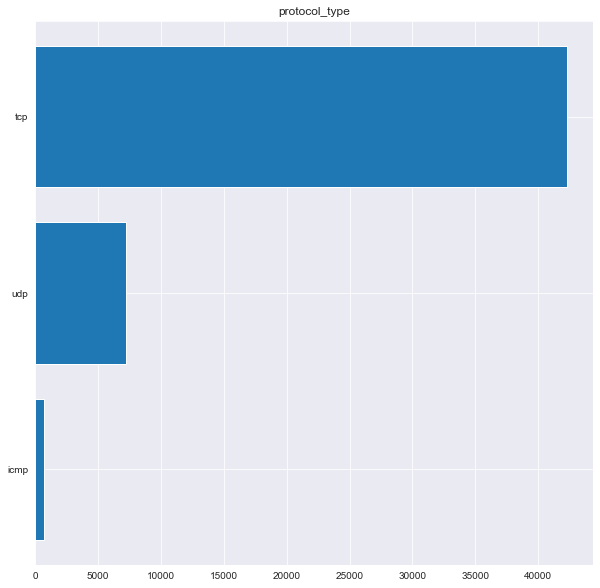

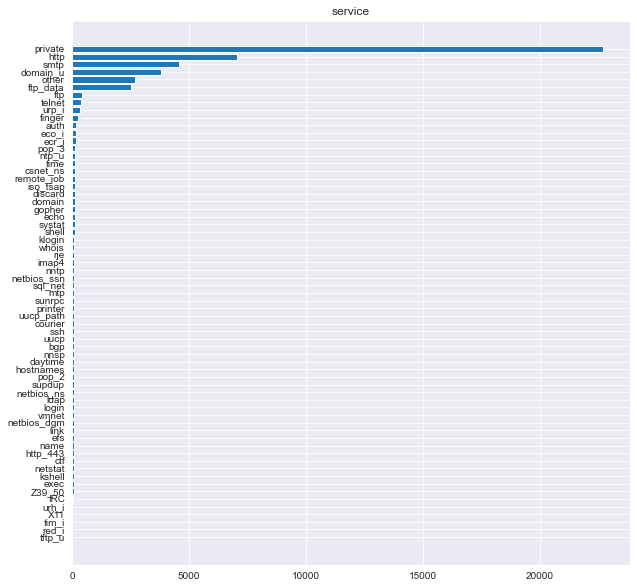

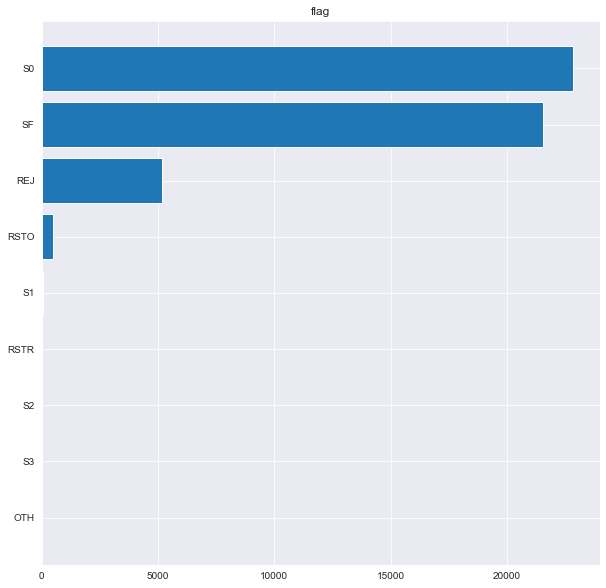

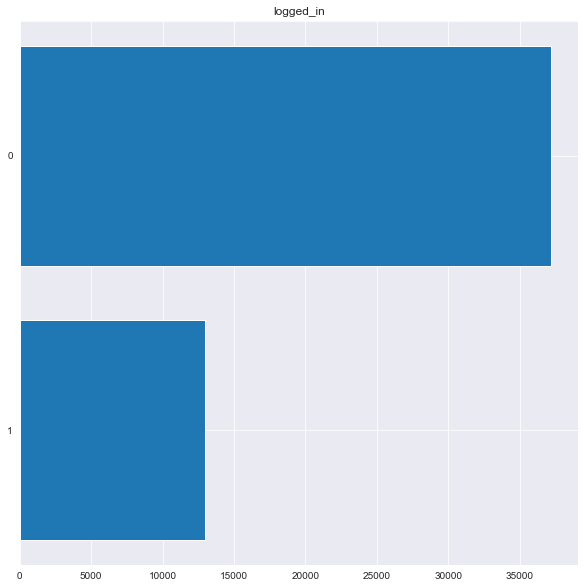

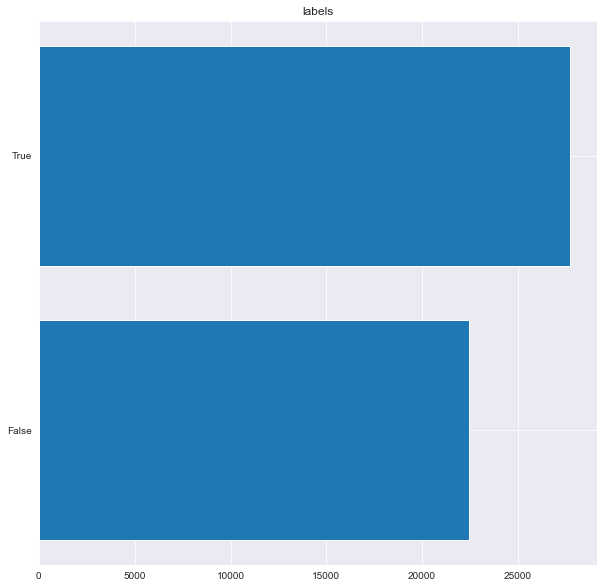

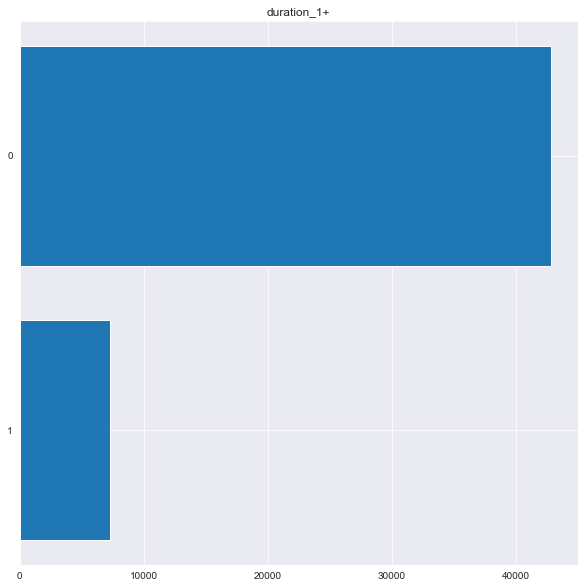

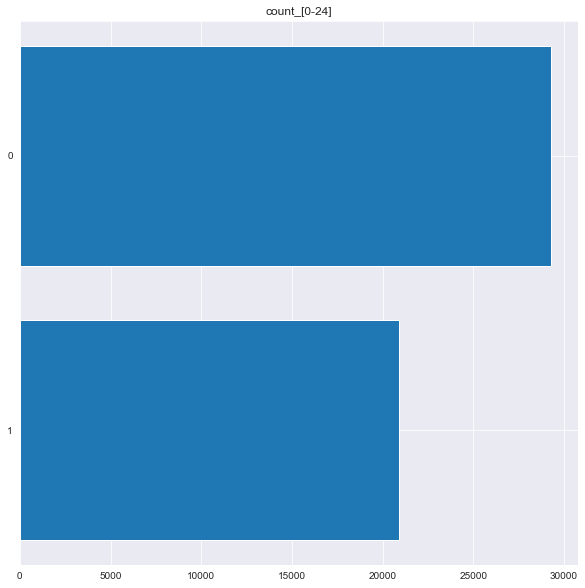

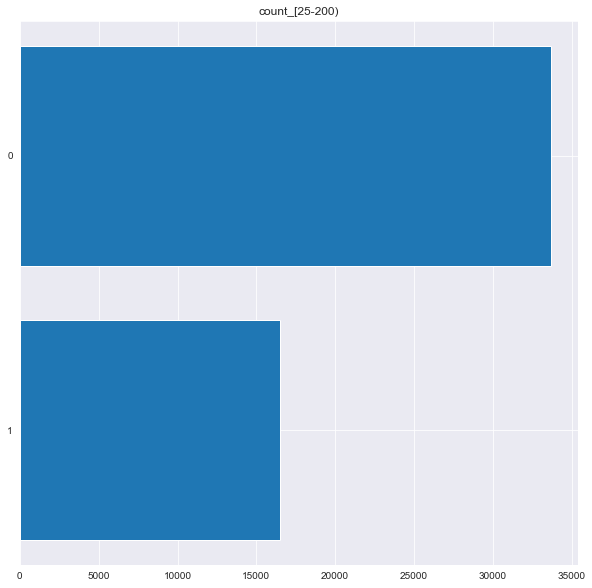

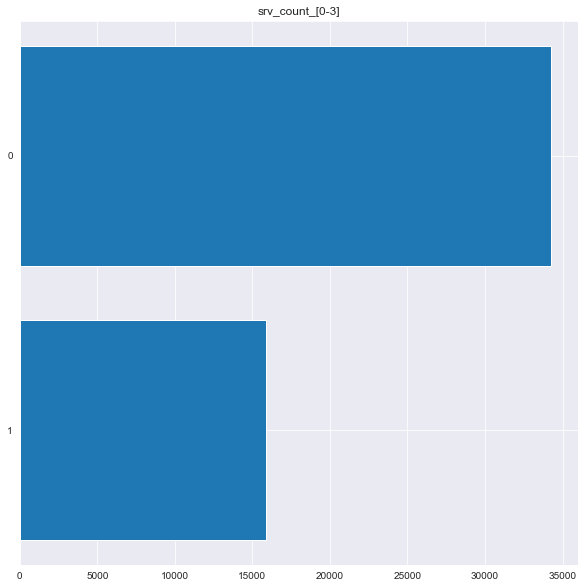

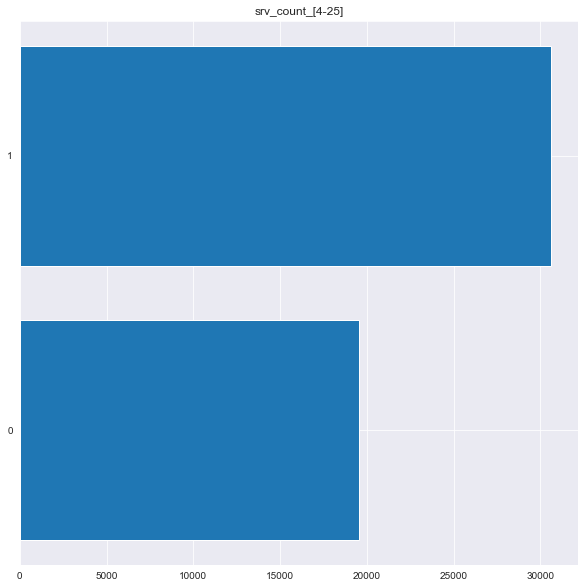

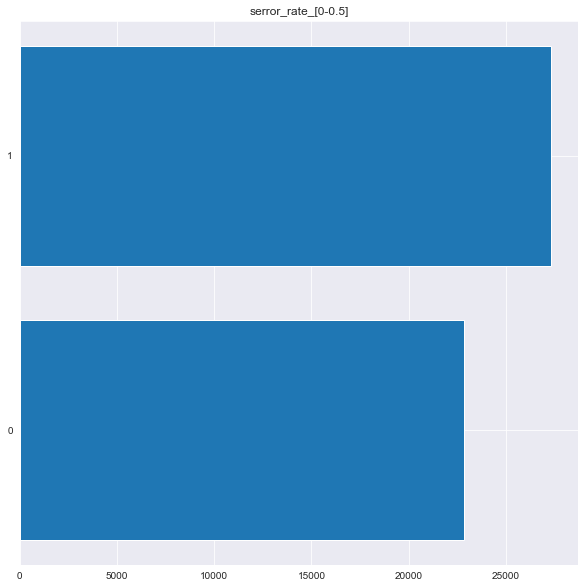

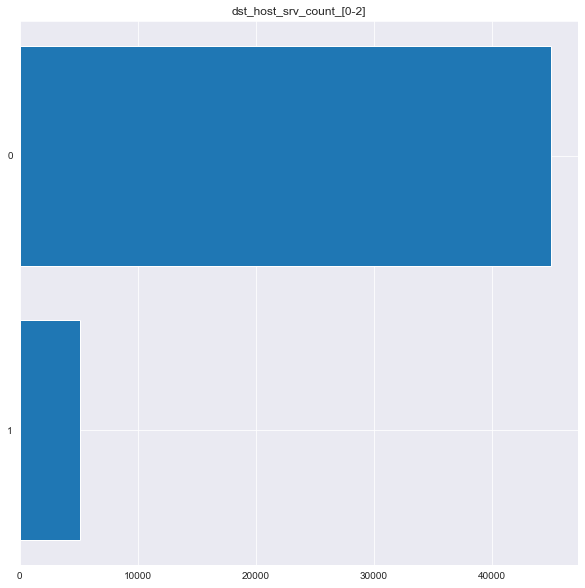

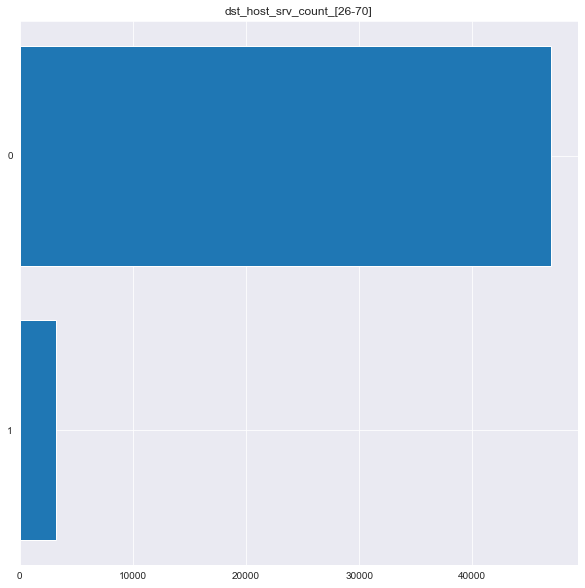

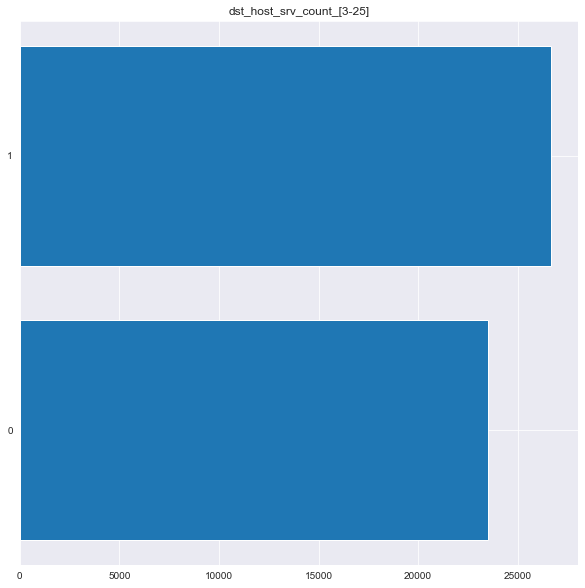

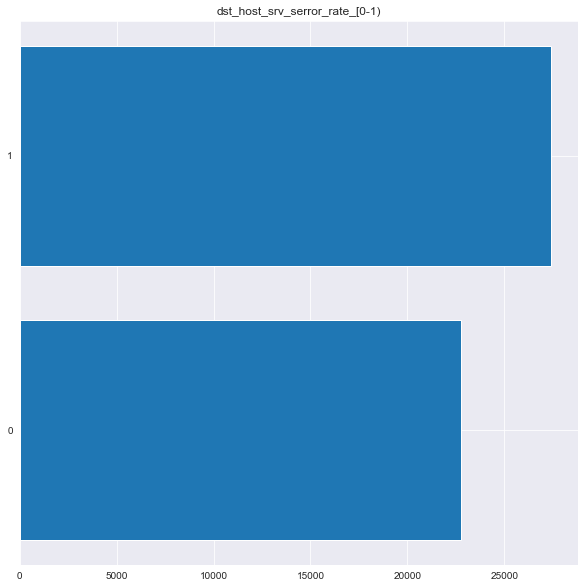

In [46]:
""" Mostrad un barplot por cada variable """
cols = pd_data.columns
for col in cols:
    mostrar_grafico_barras(col)

In [47]:
""" Transformad la variable service en una variable dummy que nos permitan identificar el servicio
    más frecuente frente al resto """
pd_data['service'] = pd_data['service'].apply(lambda x: 1 if x == b'private' else 0)
pd_data.groupby('service').size().sort_values(ascending=False)

service
0    27462
1    22715
dtype: int64

In [48]:
""" Transformad la variable flag en dos variables dummy que nos permitan identificar 3 tipos de flags, 
    los dos más comunes y el resto """
pd_data['flag'] = pd_data['flag'].apply(lambda x: 'S0' if x == b'S0' else 'SF' if x == b'SF' else 'Others')

pd_data.groupby('flag').size().sort_values(ascending=False)

flag
S0        22846
SF        21553
Others     5778
dtype: int64

In [49]:
pd_data = pd.get_dummies(pd_data, columns=['flag'], drop_first=True)

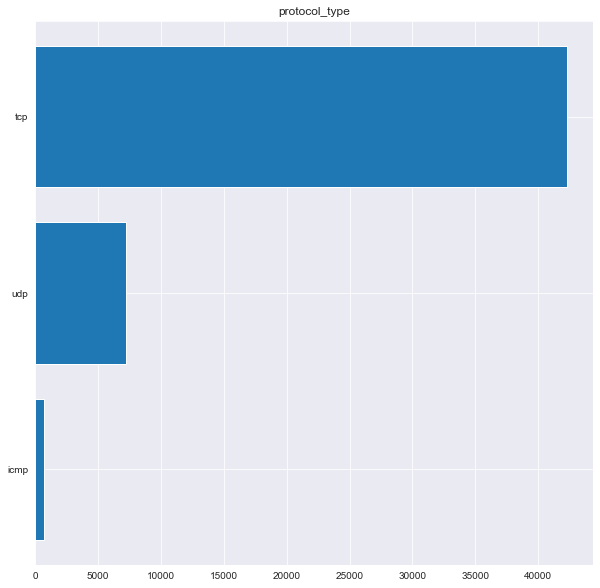

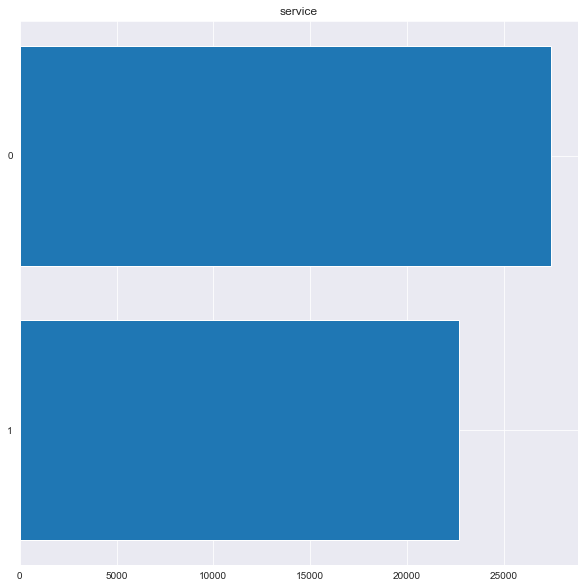

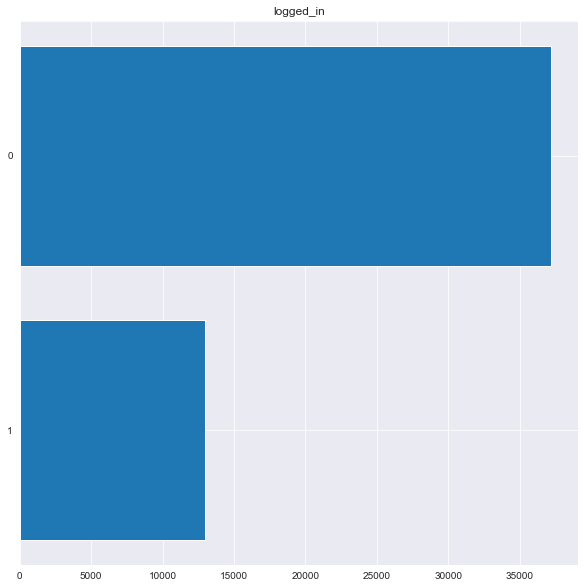

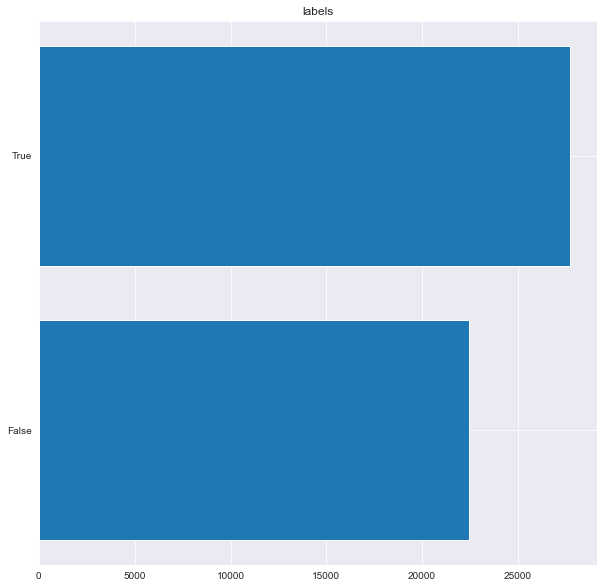

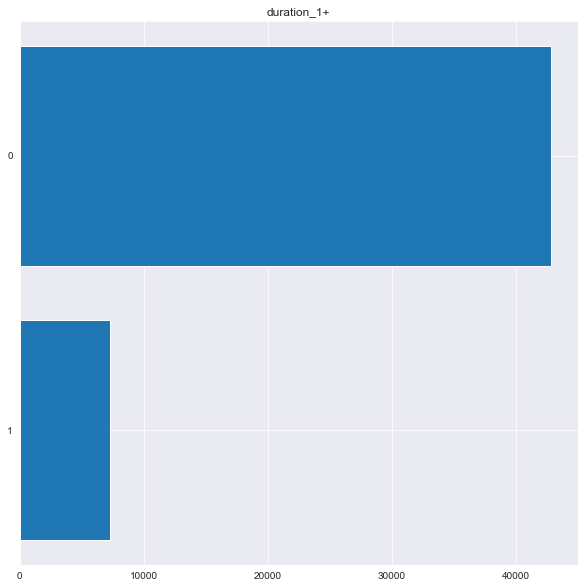

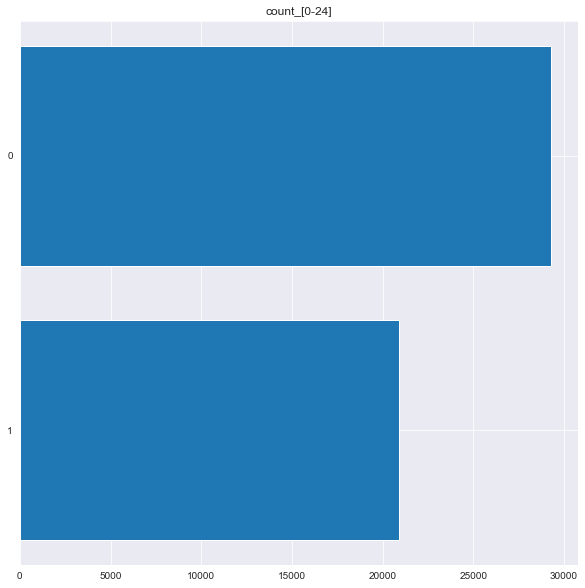

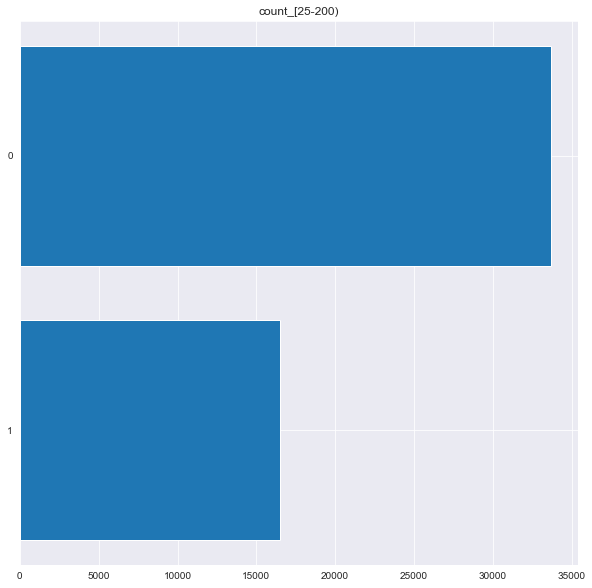

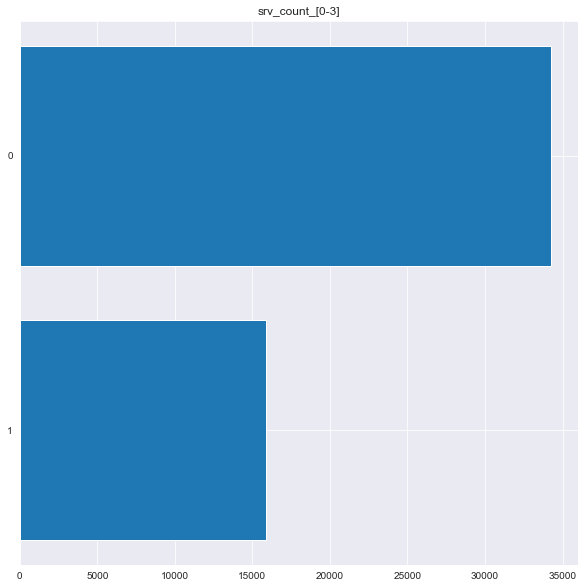

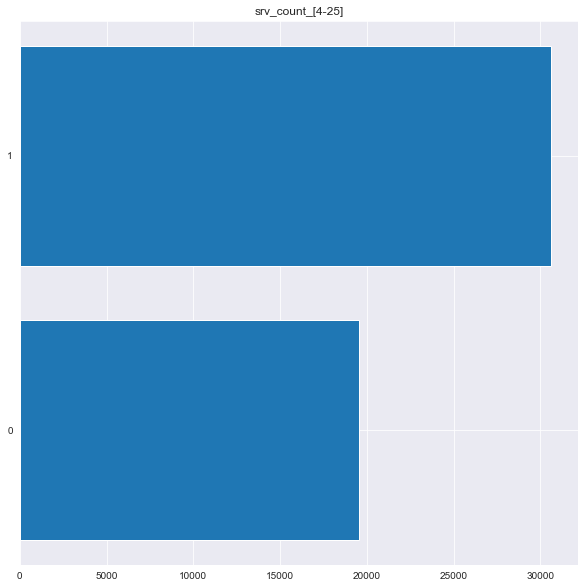

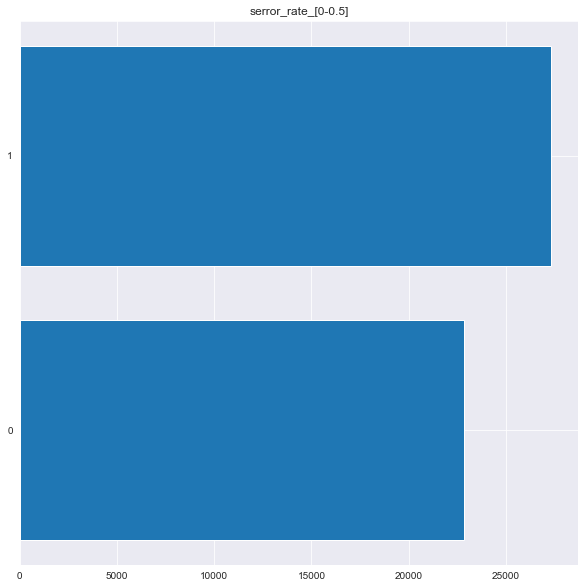

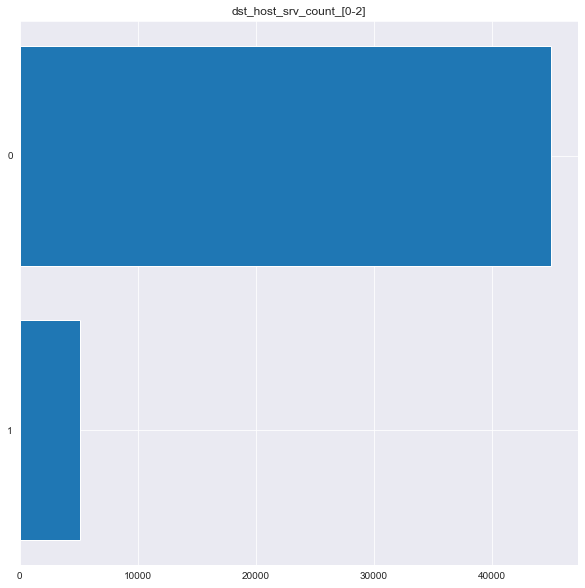

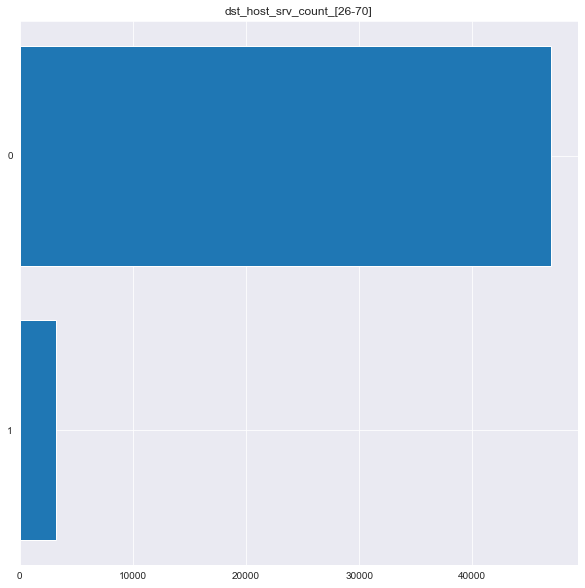

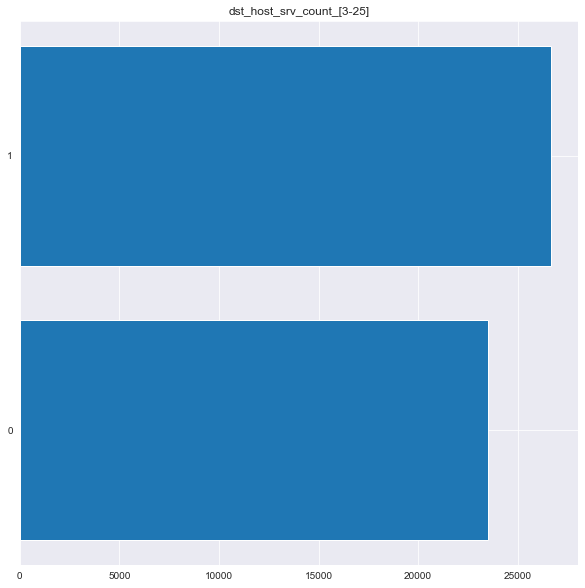

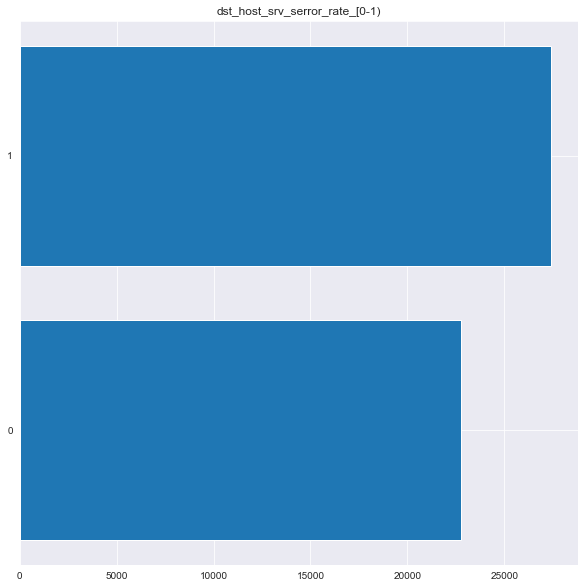

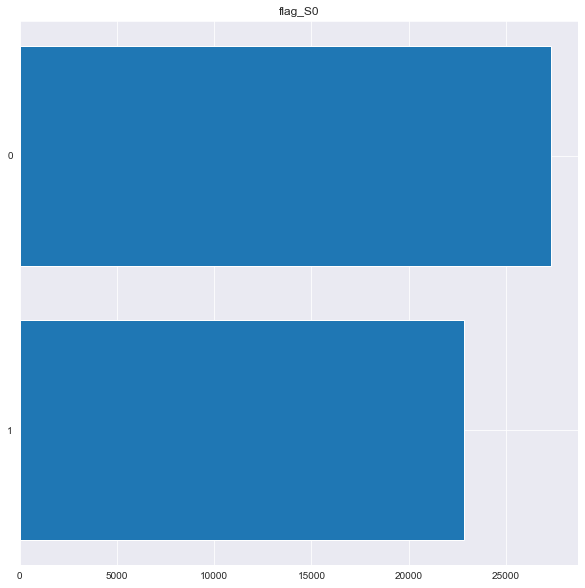

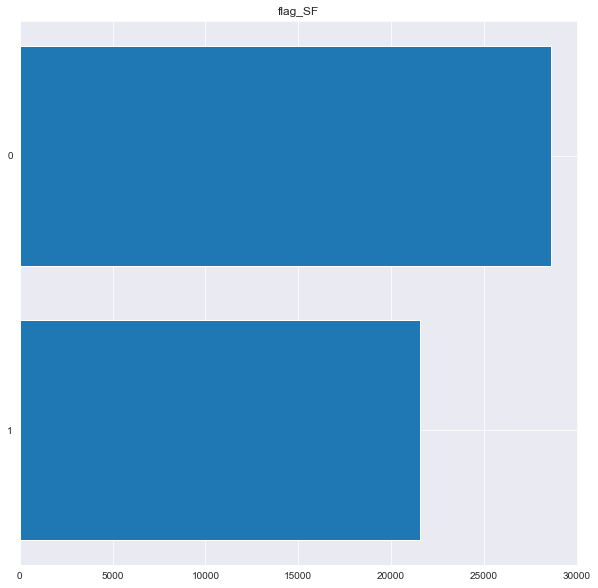

In [50]:
pd_data.logged_in = pd_data.logged_in.astype(int)
""" Volved a mostrad un barplot por cada variable """
cols = pd_data.columns
for col in cols:
    mostrar_grafico_barras(col)

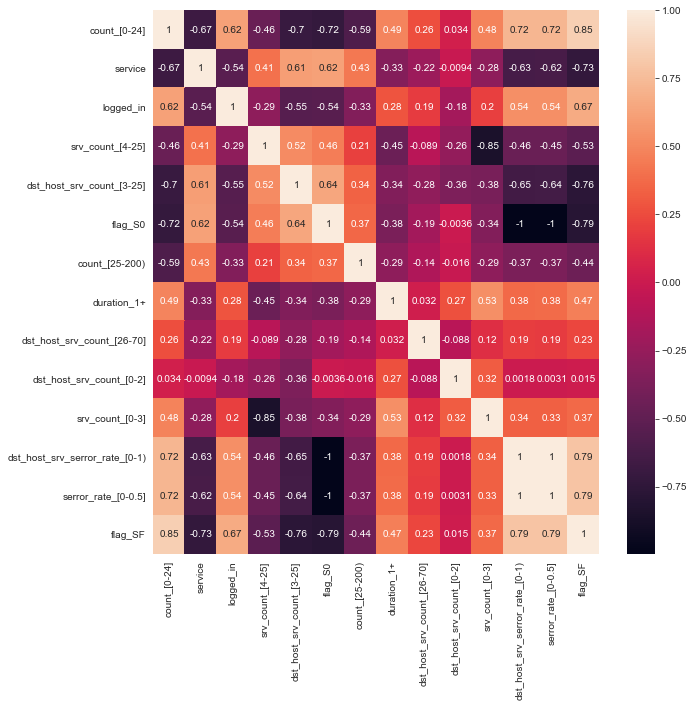

In [51]:
""" Mostrad un plot de correlaciones entre variables numéricas """
num_cols = list(set(pd_data.columns) - {'labels', 'protocol_type'}) # Salvo la variable objetivo y protocol_type
plt.figure(figsize=(10,10))
sns.heatmap(pd_data[num_cols].corr(), annot=True)
plt.show()

### Model evaluation

In [94]:
""" Realizad una evaluación de, al menos, cinco modelos de machine learning con
    la técnica de validación cruzada más acertada (10 splits). Además, se pide
    incorporar, al menos, una técnica de selección previa de las 1, 2 o 3 features que
    mejores resultados ofrezca (Nota, tendreis que usar OneHotEncoder para las variables 
    que tengan strings) """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]
X.shape

(50177, 15)

In [95]:
# En primer lugar, debemos usar OneHotEncoder para la variable protocol_type
X['protocol_type'] = X['protocol_type'].apply(lambda x: x.decode("utf-8"))

enc_protocol_type = OneHotEncoder(drop = 'first')
protocol_type = X[['protocol_type']]
X_enc = enc_protocol_type.fit_transform(protocol_type)

feature_labels = enc_protocol_type.get_feature_names()

X_protocol_type = pd.DataFrame.sparse.from_spmatrix(X_enc, columns=feature_labels, index=X.index)
X = X.drop(columns=['protocol_type'])
X = pd.concat([X, X_protocol_type], axis=1)

In [96]:
X.head()

,service,logged_in,duration_1+,count_[0-24],count_[25-200),srv_count_[0-3],srv_count_[4-25],serror_rate_[0-0.5],dst_host_srv_count_[0-2],dst_host_srv_count_[26-70],dst_host_srv_count_[3-25],dst_host_srv_serror_rate_[0-1),flag_S0,flag_SF,x0_tcp,x0_udp
0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,1.0,0.0
1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,1.0,0.0
2,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1.0,0.0
3,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1.0,0.0
4,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1.0,0.0


In [101]:
# SELECCION DE VARIABLES
# 1. TEST CHI-2
test_chi2 = SelectKBest(score_func=chi2, k=3)
fit = test_chi2.fit(X, y)

In [102]:
chi2_results = pd.DataFrame(zip(X.columns, fit.pvalues_, fit.scores_), columns=['feature', 'pval', 'score'])
chi2_results.sort_values('score', ascending = False).head(n=10)

,feature,pval,score
13,flag_SF,0.0,26608.428680
3,count_[0-24],0.0,23215.471988
12,flag_S0,0.0,18360.891078
1,logged_in,0.0,15994.933511
0,service,0.0,15737.538720
7,serror_rate_[0-0.5],0.0,15343.762709
11,dst_host_srv_serror_rate_[0-1),0.0,15278.958533
10,dst_host_srv_count_[3-25],0.0,14688.787921
2,duration_1+,0.0,9014.742552
15,x0_udp,0.0,8945.607303


In [103]:
# Aparentemente, flag_SF, count_[0-24] y flag_S0 parecen ser relevantes
# No obstante, ¿Que porcentaje de varianza logran explicar en un PCA?
pca = PCA()
fit = pca.fit(X)

# No obstante, salvo el primer autovalor el resto de ellos no suponen ni siquiera una variable
pca_data = list(zip(np.cumsum(fit.explained_variance_ratio_), pca.explained_variance_.T))
pca_statistics = pd.DataFrame(pca_data, columns=["Explained Variance (%)", "Eigenvalues"])
pca_statistics.head(n=10)

,Explained Variance (%),Eigenvalues
0,0.545420,1.705617
1,0.660272,0.359164
2,0.747711,0.273436
3,0.811735,0.200215
4,0.860982,0.154003
5,0.895992,0.109483
6,0.925986,0.093795
7,0.951396,0.079463
8,0.970235,0.058910
9,0.983701,0.042112


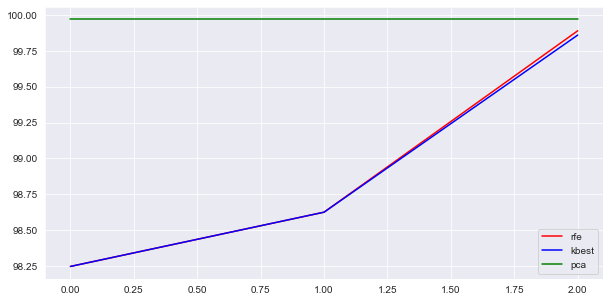

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

algorithm = RandomForestClassifier(random_state=seed)
scaler = MinMaxScaler()

accuracies_rfe = []
accuracies_kbest = []
accuracies_pca = []

for k in range(1, 4):
    selector1 = SelectKBest(score_func=chi2, k=k)
    model1 = make_pipeline(scaler, selector1, algorithm)
    model1.fit(X_train, Y_train)
    result = model1.score(X_test, Y_test)
    accuracies_rfe.append(result*100)
    
    selector2 = RFE(algorithm, n_features_to_select=k)
    model2 = make_pipeline(scaler, selector2, algorithm)
    model2.fit(X_train, Y_train)
    result = model2.score(X_test, Y_test)
    accuracies_kbest.append(result*100)
    
    selector3 = PCA(n_components=k)
    model3 = make_pipeline(scaler, selector3, algorithm)
    model3.fit(X_train, Y_train)
    result = model3.score(X_test, Y_test)
    accuracies_pca.append(result*100)
    
plt.figure(figsize=(10,5))
plt.plot(accuracies_rfe, '-', color="red", label="rfe")
plt.plot(accuracies_kbest, '-', color="blue", label="kbest")
plt.plot(accuracies_pca, '-', color="green", label="pca")
plt.legend()
plt.show()

In [134]:
cv_technique = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = seed)
rfe_cv = RFECV(algorithm, cv = cv_technique, scoring = 'accuracy')
rfe_cv = RFE_CV.fit(X, y)

In [135]:
feature_list = zip(rfe_cv.estimator_.feature_importances_, X.columns)
pd.DataFrame(feature_list, columns = ['Importance', 'Variable']).sort_values('Importance',ascending=False)

,Importance,Variable
3,0.278856,count_[0-24]
11,0.272573,dst_host_srv_serror_rate_[0-1)
10,0.078334,dst_host_srv_count_[3-25]
7,0.076617,serror_rate_[0-0.5]
8,0.075887,dst_host_srv_count_[0-2]
9,0.073512,dst_host_srv_count_[26-70]
0,0.056106,service
1,0.025918,logged_in
6,0.015850,srv_count_[4-25]
12,0.014993,flag_S0


In [146]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB',  GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))

array([0.98, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  ])